In [4]:
import joblib

# Simpan model
joblib.dump(model, 'logistic_model.pkl')

# Simpan TF-IDF vectorizer
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

                       category  rating label  \
0                Pet_Supplies_5     5.0    CG   
1                Kindle_Store_5     5.0    CG   
2                Pet_Supplies_5     5.0    CG   
3         Sports_and_Outdoors_5     5.0    CG   
4  Tools_and_Home_Improvement_5     5.0    CG   

                                                text  
0  I've replaced all my other fountain filters an...  
1  LT&T did not disappoint.  We have the characte...  
2  Both of my dogs (full grown) love the taste. I...  
3  First time user, glue last time. The only reas...  
4  Klein is second to none.  The quality and qual...  
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       200
           1       0.86      0.79      0.82       200

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400

Confusion Matrix:
 [[174

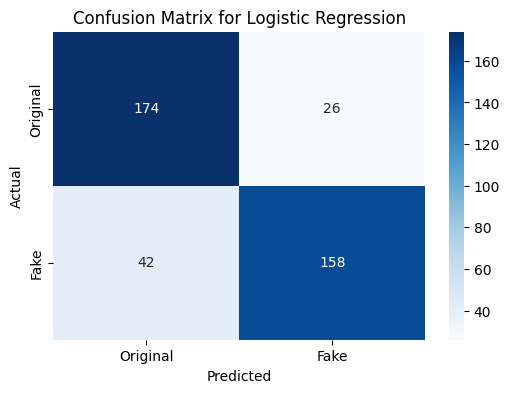

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


df = pd.read_excel('review_2000_dataset.xlsx')
print(df.head())

def clean_text(text):
    text = str(text).lower()                                  # ubah ke huruf kecil
    text = re.sub(r'<.*?>', '', text)                         # hapus HTML tags
    text = re.sub(r'[^\w\s]', '', text)                       # hapus tanda baca
    text = re.sub(r'\d+', '', text)                           # hapus angka
    text = re.sub(r'\s+', ' ', text).strip()                  # hapus spasi ekstra
    return text

df['clean_text'] = df['text'].apply(clean_text)

df['label'] = df['label'].map({'CG': 1, 'OR': 0})  # 1 = palsu, 0 = asli

X = df['clean_text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 10. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Original', 'Fake'], yticklabels=['Original', 'Fake'], cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

